In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression, SGDRegressor,Ridge, Lasso
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score,classification_report, confusion_matrix, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#from xgboost import XGBClassifier
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the Dataset
df = pd.read_csv("ml.csv")

In [3]:
df

,age,job,marital,education,default1,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,78,entrepreneur,married,primary,0,13941,yes,yes,unknown,22,jun,2363,16,785,2,unknown,no
1,21,technician,divorced,primary,0,48457,no,yes,unknown,15,nov,1671,49,748,7,success,no
2,55,student,married,secondary,0,40878,no,no,telephone,2,dec,1081,46,849,17,unknown,no
3,65,retired,divorced,tertiary,0,39626,no,no,unknown,19,may,2995,13,91,18,failure,no
4,48,housemaid,single,secondary,0,47470,no,yes,cellular,24,mar,2346,31,193,5,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,31,unemployed,married,secondary,no,3242,no,no,unknown,25,jun,292,2,-1,0,unknown,no
2996,59,technician,married,primary,no,3163,yes,no,unknown,29,may,240,2,-1,0,unknown,no
2997,50,unemployed,divorced,secondary,no,32,no,no,cellular,4,aug,282,2,-1,0,unknown,no
2998,47,admin.,married,secondary,no,310,yes,yes,telephone,14,aug,128,6,-1,0,unknown,no


In [4]:
df.head(25)

,age,job,marital,education,default1,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,78,entrepreneur,married,primary,0,13941,yes,yes,unknown,22,jun,2363,16,785,2,unknown,no
1,21,technician,divorced,primary,0,48457,no,yes,unknown,15,nov,1671,49,748,7,success,no
2,55,student,married,secondary,0,40878,no,no,telephone,2,dec,1081,46,849,17,unknown,no
3,65,retired,divorced,tertiary,0,39626,no,no,unknown,19,may,2995,13,91,18,failure,no
4,48,housemaid,single,secondary,0,47470,no,yes,cellular,24,mar,2346,31,193,5,failure,no
5,22,entrepreneur,divorced,secondary,0,30806,no,yes,cellular,12,oct,1814,2,611,4,unknown,yes
6,22,blue-collar,married,secondary,0,43580,no,yes,cellular,28,feb,4564,7,832,20,failure,yes
7,64,services,married,tertiary,0,33373,no,no,unknown,4,aug,4898,42,816,9,unknown,no
8,70,admin,married,secondary,0,12844,yes,no,unknown,15,may,4268,38,806,16,failure,no
9,49,student,married,secondary,0,49412,no,no,telephone,23,nov,856,14,93,14,unknown,no


In [5]:
df.size

51000

In [6]:
df.shape

(3000, 17)

In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default1     object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
target       object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        3000 non-null   int64 
 1   job        3000 non-null   object
 2   marital    3000 non-null   object
 3   education  3000 non-null   object
 4   default1   3000 non-null   object
 5   balance    3000 non-null   int64 
 6   housing    3000 non-null   object
 7   loan       3000 non-null   object
 8   contact    3000 non-null   object
 9   day        3000 non-null   int64 
 10  month      3000 non-null   object
 11  duration   3000 non-null   int64 
 12  campaign   3000 non-null   int64 
 13  pdays      3000 non-null   int64 
 14  previous   3000 non-null   int64 
 15  poutcome   3000 non-null   object
 16  target     3000 non-null   object
dtypes: int64(7), object(10)
memory usage: 398.6+ KB


In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default1', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'target'],
      dtype='object')

In [10]:
#checking Null Values in the dataset
df.isnull()

,age,job,marital,education,default1,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
#checking the sum of the Dataset
df.isnull().sum()

age          0
job          0
marital      0
education    0
default1     0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
target       0
dtype: int64

<AxesSubplot:>

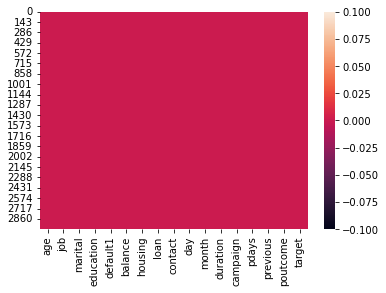

In [12]:
#checking Null values by heatmap

sns.heatmap(df.isnull())

In [13]:
#checking any space in the dataset 

(df == ' ?')

,age,job,marital,education,default1,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
(df == ' ?').sum()

age          0
job          0
marital      0
education    0
default1     0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
target       0
dtype: int64

## Or

In [15]:
(df == ' ').sum()

age          0
job          0
marital      0
education    0
default1     0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
target       0
dtype: int64

In [16]:
#checking any null value in the target column
df[df['target'] == '']

,age,job,marital,education,default1,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target


In [17]:
df[df['target'] == ''].index

Int64Index([], dtype='int64')

In [18]:
df['target'].value_counts()

no     2427
yes     573
Name: target, dtype: int64

In [19]:
df['target'].unique()

array(['no', 'yes'], dtype=object)

In [20]:
df.nunique()

age            66
job            13
marital         3
education       4
default1        3
balance      2039
housing         2
loan            2
contact         3
day            31
month          12
duration     1122
campaign       50
pdays         506
previous       21
poutcome        4
target          2
dtype: int64

In [21]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,42.544333,5352.900333,15.922667,673.882333,6.617000,113.062667,2.288333
std,12.613474,10957.766572,8.386028,1098.525839,10.501067,211.215285,4.793488
min,18.000000,-4794.000000,1.000000,3.000000,1.000000,-1.000000,0.000000
25%,33.000000,115.750000,9.000000,118.000000,1.000000,-1.000000,0.000000
50%,40.000000,705.500000,16.000000,226.000000,2.000000,-1.000000,0.000000
75%,51.000000,3612.250000,22.000000,555.500000,5.000000,152.500000,2.000000
max,86.000000,49996.000000,31.000000,4996.000000,50.000000,871.000000,20.000000


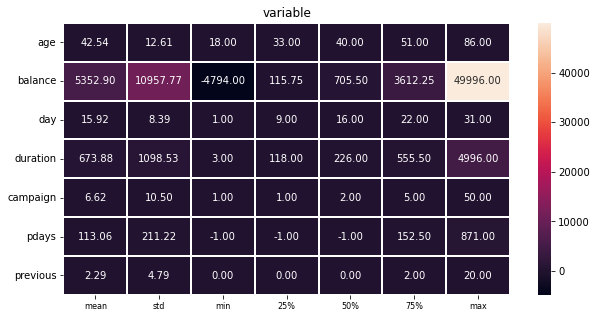

In [22]:
plt.figure(figsize=(10,5))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='.2f')
plt.xticks(fontsize=14)
plt.xticks(fontsize=8)
plt.title('variable')
plt.show()

# Data Cleaning and Preprocessing

In [23]:
df['age'].value_counts()

34    137
32    133
35    124
33    114
31    107
     ... 
18      6
76      4
83      2
81      1
86      1
Name: age, Length: 66, dtype: int64

In [24]:
df['age'].unique()

array([78, 21, 55, 65, 48, 22, 64, 70, 49, 54, 58, 37, 57, 73, 46, 35, 47,
       24, 69, 63, 72, 28, 23, 53, 50, 29, 79, 62, 19, 44, 39, 66, 42, 74,
       71, 18, 34, 68, 25, 45, 40, 31, 20, 59, 61, 30, 60, 32, 56, 52, 80,
       76, 43, 38, 27, 36, 33, 67, 41, 77, 75, 51, 26, 81, 83, 86],
      dtype=int64)

no     2427
yes     573
Name: target, dtype: int64


<AxesSubplot:xlabel='target', ylabel='Count'>

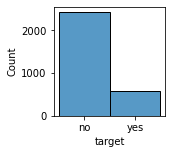

In [25]:
#Histplot for "tenure" column
print(df["target"].value_counts())
plt.figure(figsize=(2,2))
sns.histplot(x='target',data=df,bins=73)

<AxesSubplot:xlabel='age', ylabel='count'>

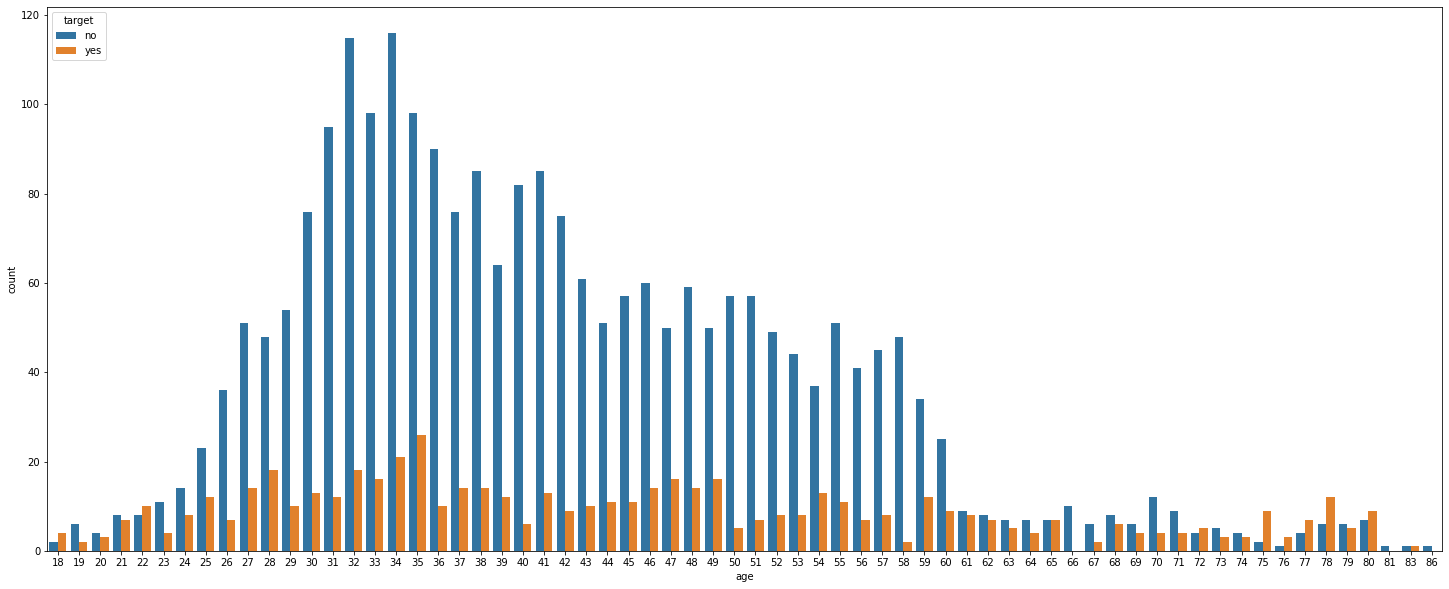

In [26]:
#  Bivariate Analysis
plt.figure(figsize=(25,10))
sns.countplot('age', data=df,hue='target')

<AxesSubplot:xlabel='job', ylabel='count'>

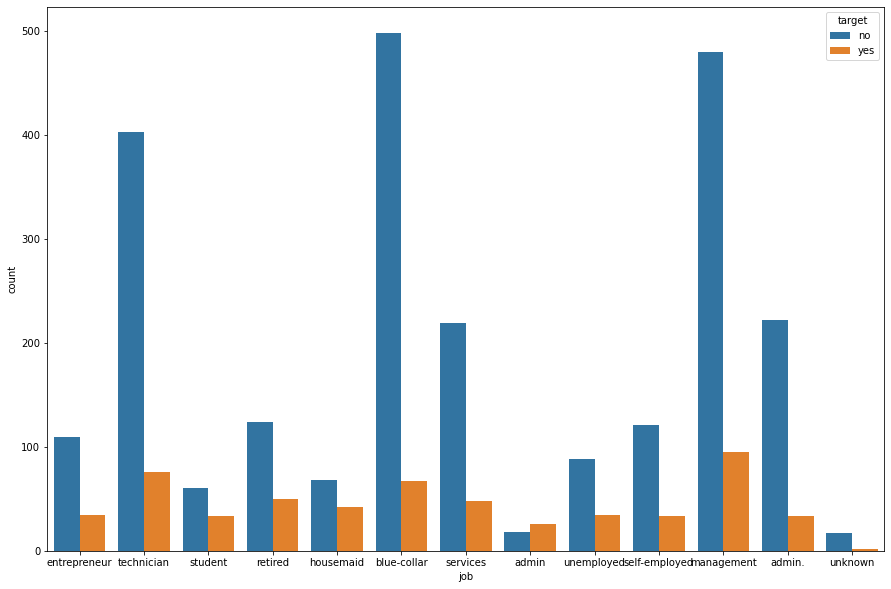

In [27]:
#  Bivariate Analysis
plt.figure(figsize=(15,10))
sns.countplot('job', data=df,hue='target')

<AxesSubplot:xlabel='marital', ylabel='count'>

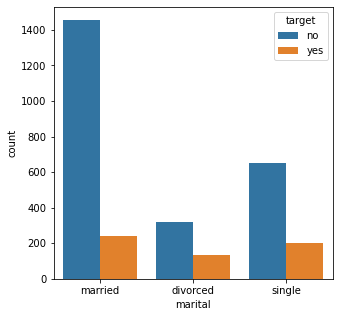

In [28]:
#  Bivariate Analysis
plt.figure(figsize=(5,5))
sns.countplot('marital', data=df,hue='target')

<AxesSubplot:xlabel='education', ylabel='count'>

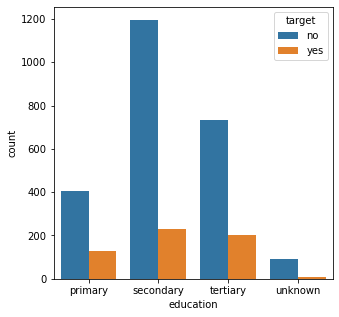

In [29]:
#  Bivariate Analysis
plt.figure(figsize=(5,5))
sns.countplot('education', data=df,hue='target')

<AxesSubplot:xlabel='default1', ylabel='count'>

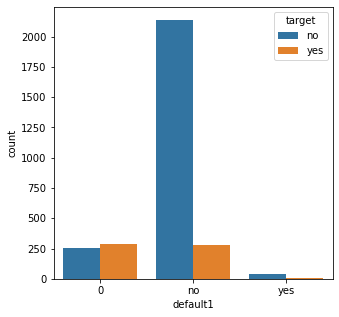

In [30]:
#  Bivariate Analysis
plt.figure(figsize=(5,5))
sns.countplot('default1', data=df,hue='target')

<AxesSubplot:xlabel='balance'>

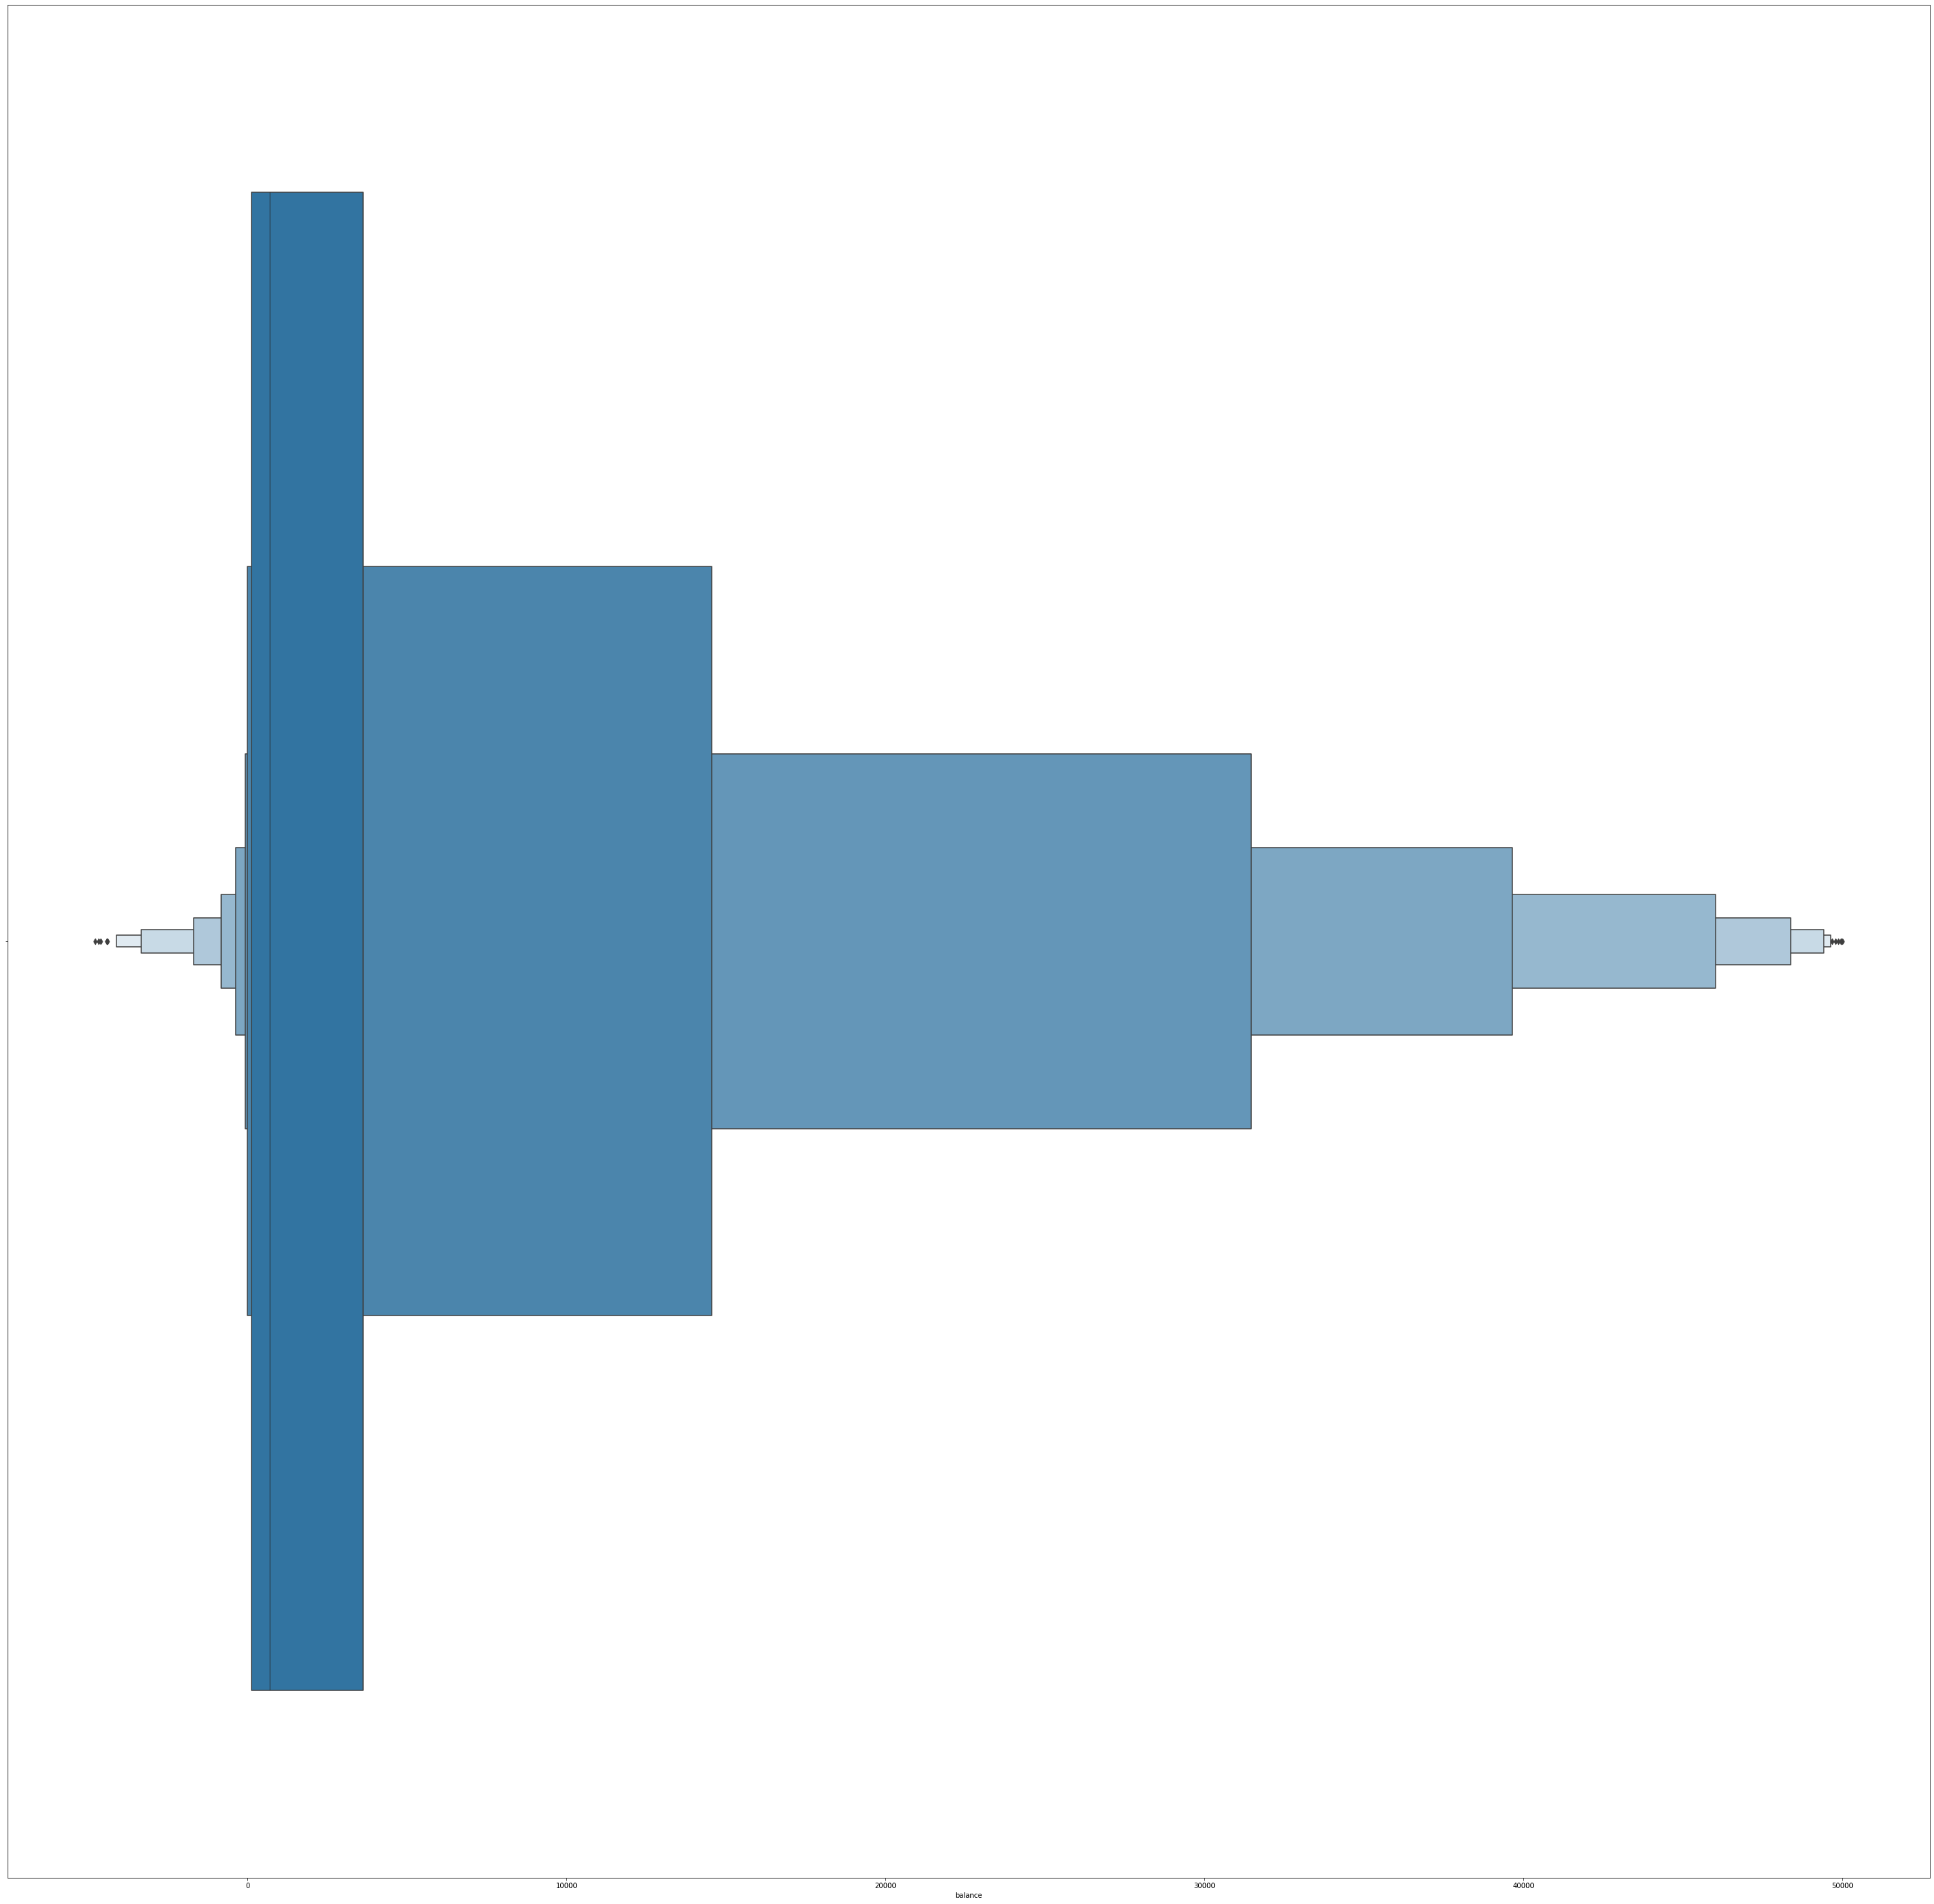

In [31]:
#  Bivariate Analysis
plt.figure(figsize=(50,50))
sns.boxenplot('balance', data=df,hue='target')

<AxesSubplot:xlabel='housing', ylabel='count'>

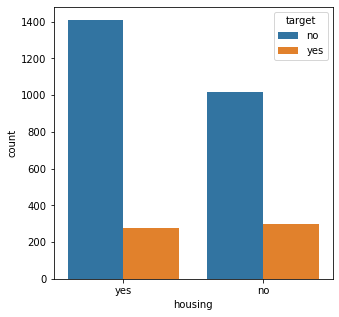

In [32]:
#  Bivariate Analysis
plt.figure(figsize=(5,5))
sns.countplot('housing', data=df,hue='target')

<AxesSubplot:xlabel='loan', ylabel='count'>

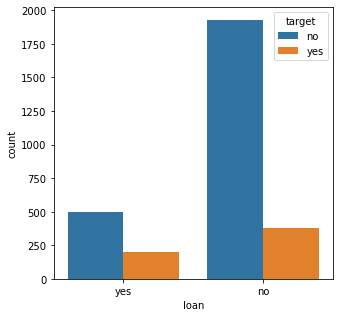

In [33]:
#  Bivariate Analysis
plt.figure(figsize=(5,5))
sns.countplot('loan', data=df,hue='target')

<AxesSubplot:xlabel='contact', ylabel='count'>

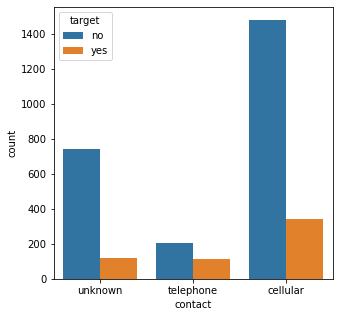

In [34]:
#  Bivariate Analysis
plt.figure(figsize=(5,5))
sns.countplot('contact', data=df,hue='target')

<AxesSubplot:xlabel='day', ylabel='count'>

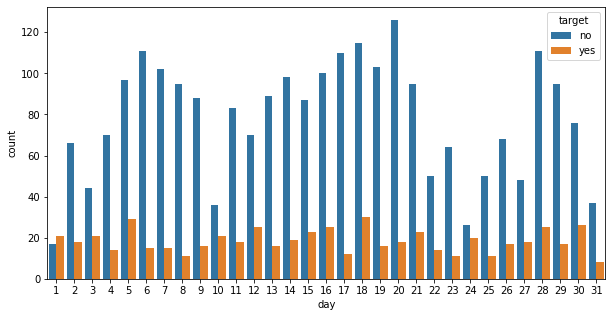

In [35]:
#  Bivariate Analysis
plt.figure(figsize=(10,5))
sns.countplot('day', data=df,hue='target')

<AxesSubplot:xlabel='month', ylabel='count'>

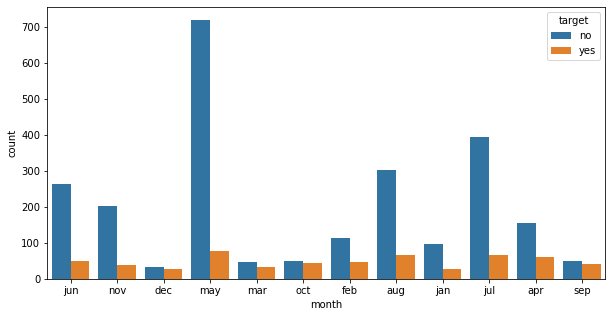

In [36]:
#  Bivariate Analysis
plt.figure(figsize=(10,5))
sns.countplot('month', data=df,hue='target')

<AxesSubplot:xlabel='duration'>

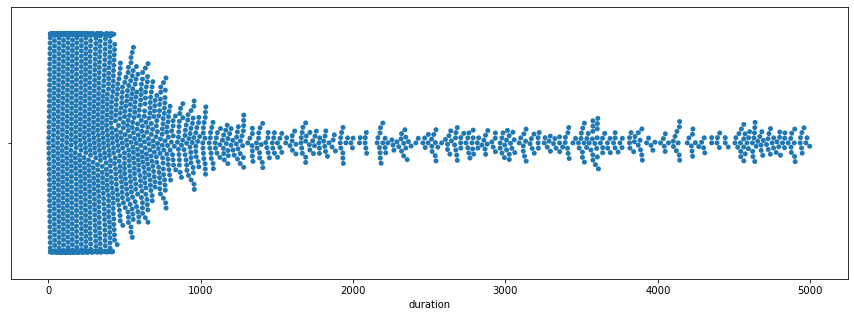

In [37]:
#  Bivariate Analysis
plt.figure(figsize=(15,5))
sns.swarmplot('duration', data=df,hue='target')

<AxesSubplot:xlabel='campaign', ylabel='count'>

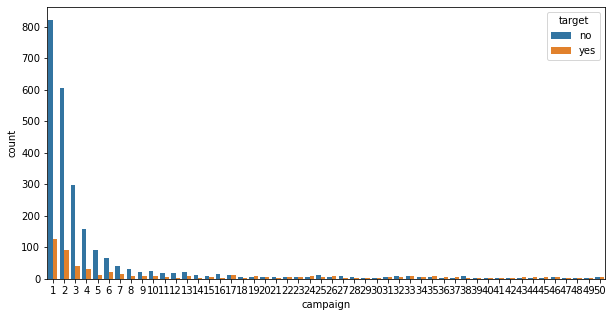

In [38]:
#  Bivariate Analysis
plt.figure(figsize=(10,5))
sns.countplot('campaign', data=df,hue='target')

<AxesSubplot:xlabel='pdays', ylabel='count'>

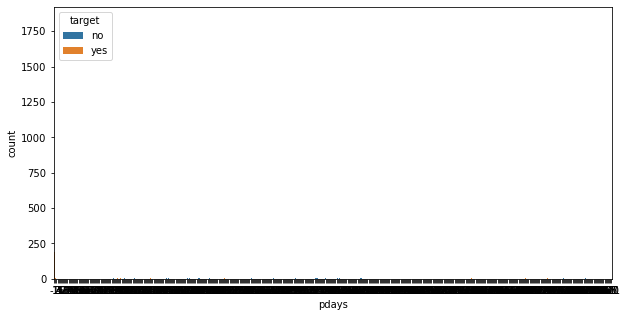

In [39]:
#  Bivariate Analysis
plt.figure(figsize=(10,5))
sns.countplot('pdays', data=df,hue='target')

<AxesSubplot:xlabel='previous', ylabel='count'>

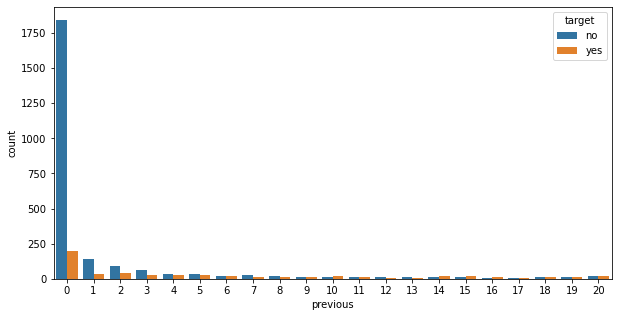

In [40]:
#  Bivariate Analysis
plt.figure(figsize=(10,5))
sns.countplot('previous', data=df,hue='target')

<AxesSubplot:xlabel='poutcome', ylabel='count'>

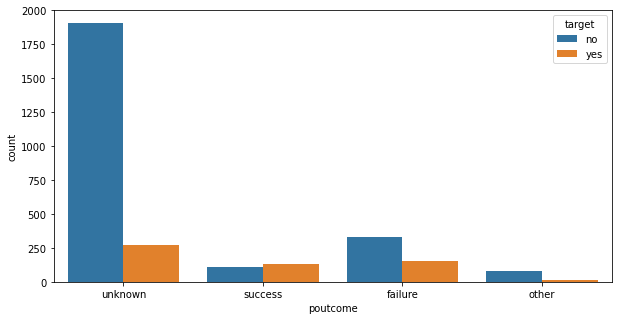

In [41]:
#  Bivariate Analysis
plt.figure(figsize=(10,5))
sns.countplot('poutcome', data=df,hue='target')

<AxesSubplot:xlabel='target', ylabel='count'>

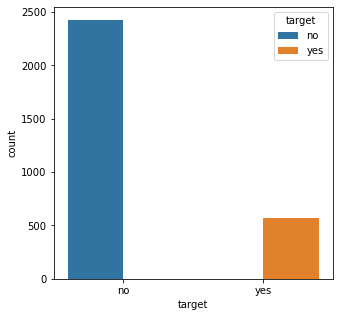

In [42]:
#  Bivariate Analysis
plt.figure(figsize=(5,5))
sns.countplot('target', data=df,hue='target')

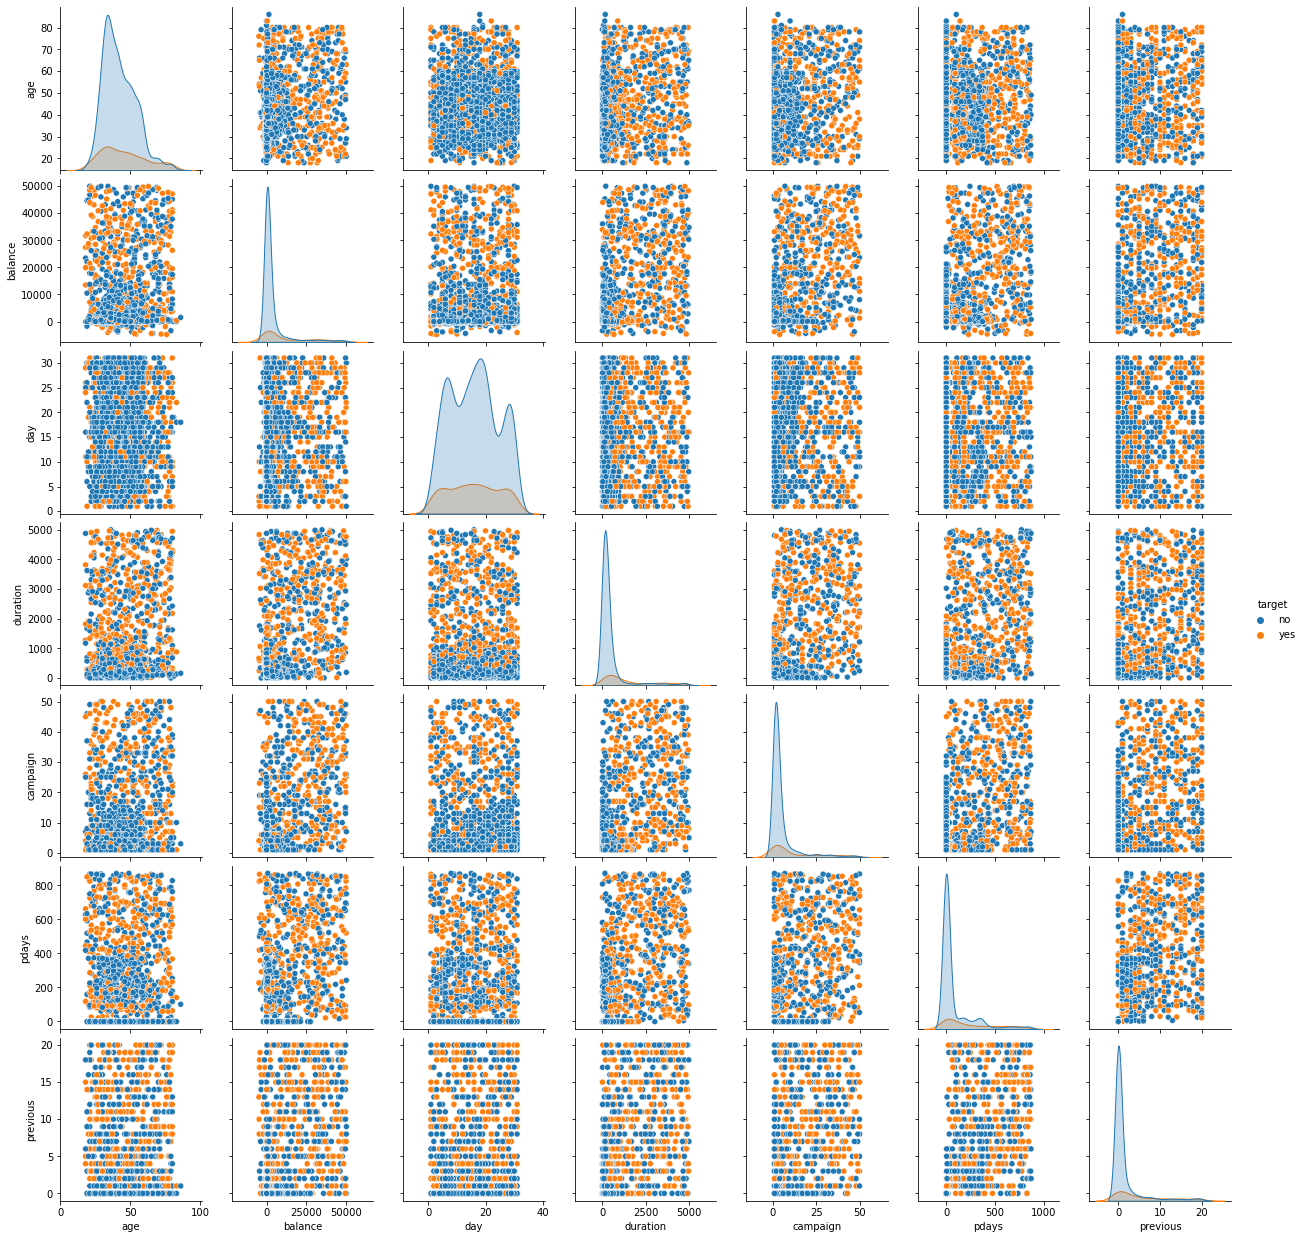

In [43]:
sns.pairplot(df,hue='target')

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
enc = LabelEncoder()
for i in df.columns:
    if df[i].dtypes =='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [46]:
enc

LabelEncoder()

In [47]:
df.dtypes

age          int64
job          int32
marital      int32
education    int32
default1     int32
balance      int64
housing      int32
loan         int32
contact      int32
day          int64
month        int32
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int32
target       int32
dtype: object

In [48]:
df.head(50)

,age,job,marital,education,default1,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,78,3,1,0,0,13941,1,1,2,22,6,2363,16,785,2,3,0
1,21,10,0,0,0,48457,0,1,2,15,9,1671,49,748,7,2,0
2,55,9,1,1,0,40878,0,0,1,2,2,1081,46,849,17,3,0
3,65,6,0,2,0,39626,0,0,2,19,8,2995,13,91,18,0,0
4,48,4,2,1,0,47470,0,1,0,24,7,2346,31,193,5,0,0
5,22,3,0,1,0,30806,0,1,0,12,10,1814,2,611,4,3,1
6,22,2,1,1,0,43580,0,1,0,28,3,4564,7,832,20,0,1
7,64,8,1,2,0,33373,0,0,2,4,1,4898,42,816,9,3,0
8,70,0,1,1,0,12844,1,0,2,15,8,4268,38,806,16,0,0
9,49,9,1,1,0,49412,0,0,1,23,9,856,14,93,14,3,0


In [49]:
#  Checking Correlation
df.corr()

,age,job,marital,education,default1,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
age,1.000000,-0.006879,-0.277336,-0.079299,-0.257375,0.204662,-0.140215,0.091805,0.029132,-0.023065,-0.029520,0.233904,0.251159,0.185503,0.209639,-0.110934,0.104228
job,-0.006879,1.000000,0.049811,0.141968,-0.059418,0.051738,-0.100789,-0.020641,-0.052736,-0.001732,-0.074376,0.039818,0.042845,0.032699,0.071246,-0.026334,0.029676
marital,-0.277336,0.049811,1.000000,0.049593,0.055551,-0.051511,-0.010180,-0.024769,-0.087654,0.016374,-0.022771,-0.069761,-0.061184,-0.038706,-0.058770,0.006073,-0.007589
education,-0.079299,0.141968,0.049593,1.000000,0.083455,-0.052875,-0.073445,-0.062437,-0.100180,0.020882,-0.023730,-0.081193,-0.075881,-0.069109,-0.077918,0.003341,-0.027504
default1,-0.257375,-0.059418,0.055551,0.083455,1.000000,-0.747312,0.030127,-0.333821,-0.120259,-0.016450,0.001479,-0.765682,-0.747755,-0.721594,-0.752999,0.353408,-0.388559
balance,0.204662,0.051738,-0.051511,-0.052875,-0.747312,1.000000,-0.059678,0.265495,0.100824,0.023903,-0.009194,0.611102,0.610263,0.581159,0.604532,-0.277753,0.319980
housing,-0.140215,-0.100789,-0.010180,-0.073445,0.030127,-0.059678,1.000000,-0.004647,0.153777,-0.023051,0.214046,-0.003805,-0.039072,0.041837,-0.003903,-0.052149,-0.078333
loan,0.091805,-0.020641,-0.024769,-0.062437,-0.333821,0.265495,-0.004647,1.000000,0.010603,0.012698,0.018966,0.284798,0.271938,0.256722,0.294000,-0.140561,0.128700
contact,0.029132,-0.052736,-0.087654,-0.100180,-0.120259,0.100824,0.153777,0.010603,1.000000,0.002755,0.291704,0.084169,0.115626,0.024948,0.049152,0.141460,-0.038532
day,-0.023065,-0.001732,0.016374,0.020882,-0.016450,0.023903,-0.023051,0.012698,0.002755,1.000000,-0.023518,-0.003381,0.049883,-0.037482,-0.006886,0.056775,-0.009374


In [50]:
df.corr()['target'].sort_values()

default1    -0.388559
poutcome    -0.200234
housing     -0.078333
contact     -0.038532
month       -0.032905
education   -0.027504
day         -0.009374
marital     -0.007589
job          0.029676
age          0.104228
loan         0.128700
campaign     0.305412
balance      0.319980
pdays        0.327039
previous     0.355243
duration     0.400437
target       1.000000
Name: target, dtype: float64

We can observe :
All columns are sorted in ascending order showing least to strong correlation with target column. 
13 columns are negatively correlated and 7 columns are positively correlated. Column 'MonthlyCharges' 
is highly correlated with Target column 'Churn' and Column 'Contract' is least correlated with Target column 'Churn'.

<AxesSubplot:>

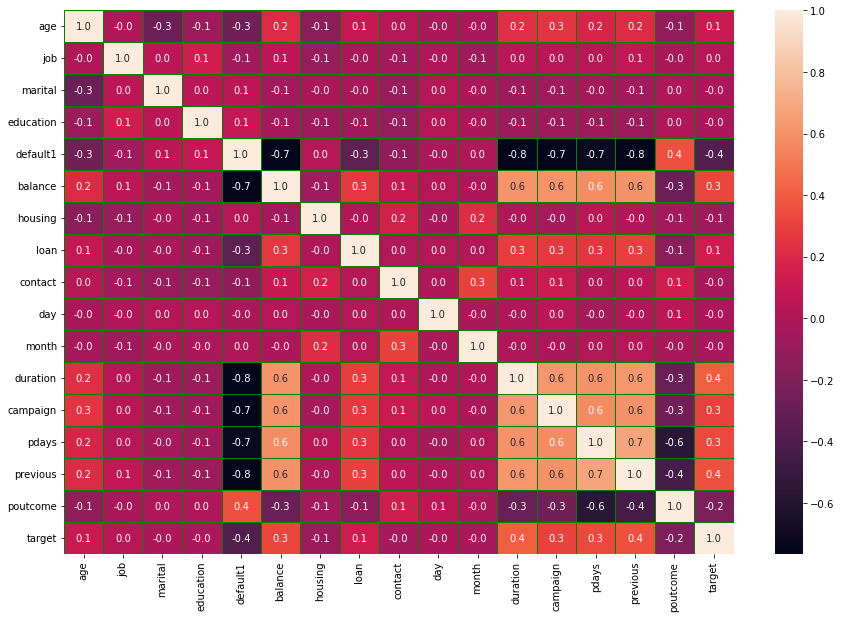

In [51]:
# Checking Correlation with Heatmap

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='green',fmt='.1f')

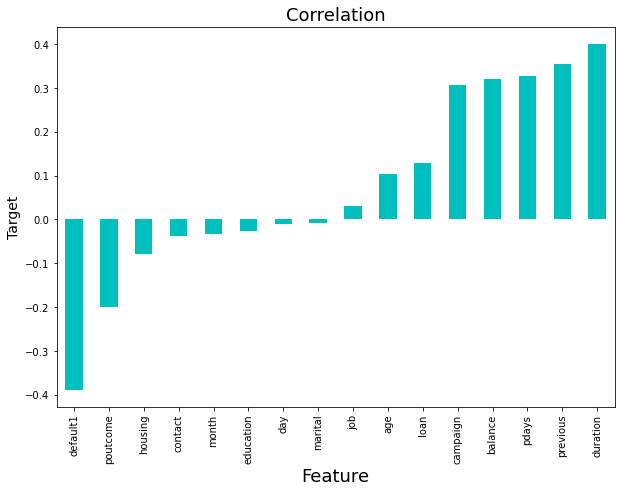

In [52]:
#  Checking Correlation with barplot
plt.figure(figsize=(10,7))
df.corr()['target'].sort_values(ascending=True).drop(['target']).plot(kind='bar',color = 'c')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize = 18)
plt.show()

# Checking Outliers

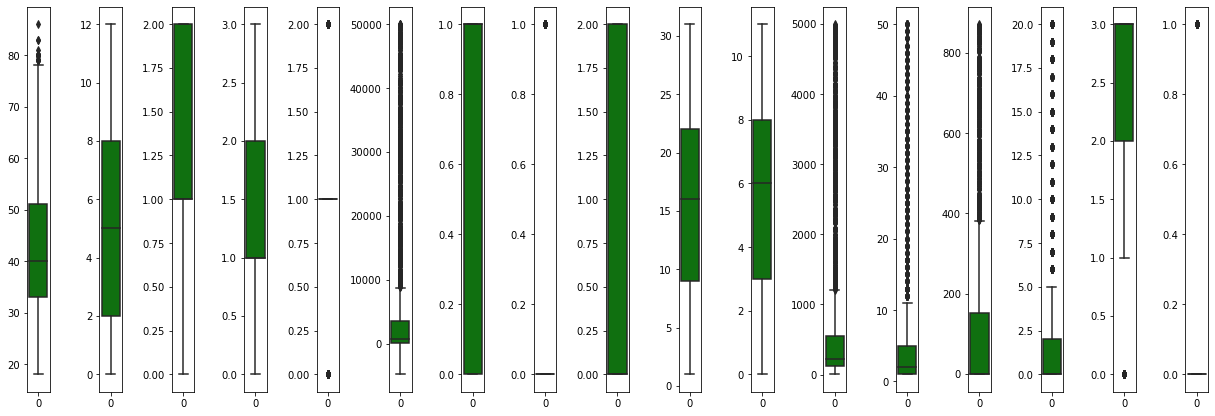

In [53]:
collist=df.columns.values
ncol=21
nrows=11
plt.figure(figsize=(ncol,3*ncol))
for column in range(0,len(collist)):
    plt.subplot(nrows,ncol,column+1)
    sns.boxplot(data=df[collist[column]],color='green',orient='v')
  #  plt.xlabel(column,frontsize = 15)
    plt.tight_layout()

In [54]:
df.skew()

age          0.767774
job          0.168834
marital     -0.134287
education    0.092291
default1    -1.167129
balance      2.503784
housing     -0.248689
loan         1.270450
contact      0.672371
day          0.067949
month       -0.366216
duration     2.428033
campaign     2.480695
pdays        1.973071
previous     2.345469
poutcome    -1.441134
target       1.572949
dtype: float64

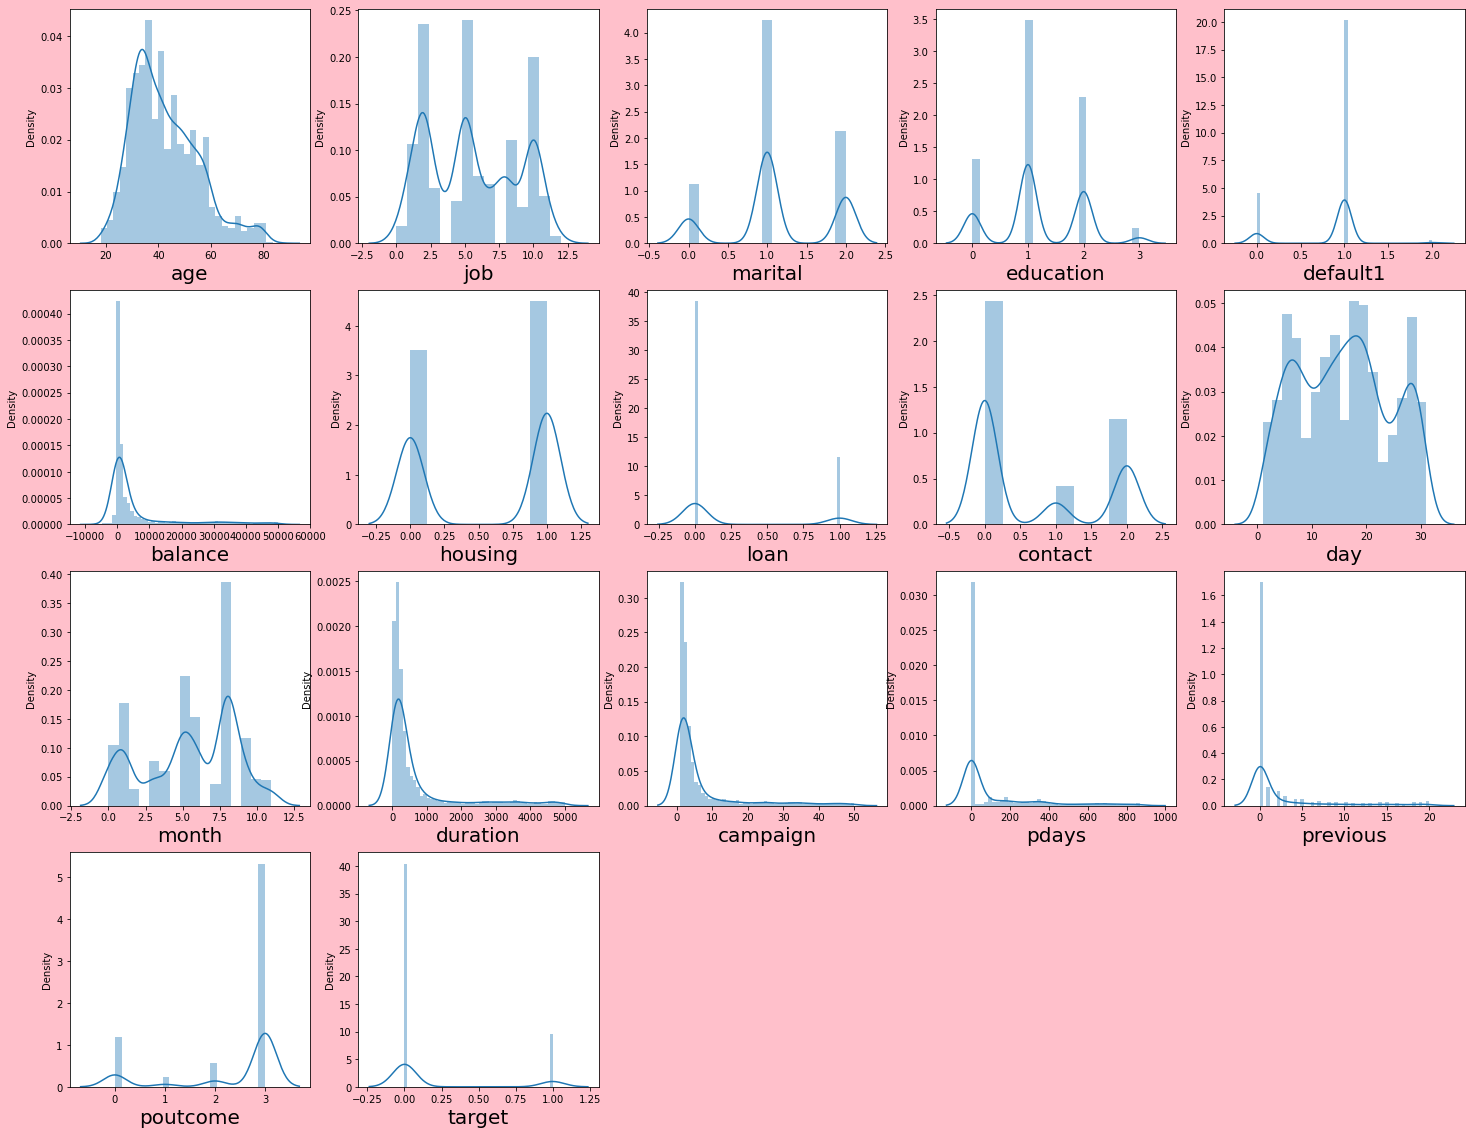

In [55]:
plt.figure(figsize=(25,25), facecolor='pink')
plotnumber = 1

for column in df:
    if plotnumber<=21:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [56]:
from sklearn.preprocessing import PowerTransformer

In [57]:
collist = ['poutcome']
df[collist]=power_transform(df[collist],method='yeo-johnson')
df[collist]

,poutcome
0,0.597846
1,-0.917857
2,0.597846
3,-1.900276
4,-1.900276
...,...
2995,0.597846
2996,0.597846
2997,0.597846
2998,0.597846


In [58]:
df.skew()

age          0.767774
job          0.168834
marital     -0.134287
education    0.092291
default1    -1.167129
balance      2.503784
housing     -0.248689
loan         1.270450
contact      0.672371
day          0.067949
month       -0.366216
duration     2.428033
campaign     2.480695
pdays        1.973071
previous     2.345469
poutcome    -1.164582
target       1.572949
dtype: float64

<AxesSubplot:xlabel='poutcome', ylabel='Density'>

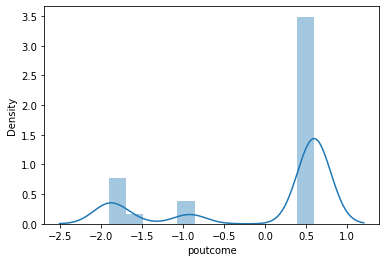

In [59]:
sns.distplot(df['poutcome'])

# Data Preprocessing

In [60]:
x=df.drop("target",axis=1)
y=df["target"]

In [61]:
x.columns

Index(['age', 'job', 'marital', 'education', 'default1', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [62]:
x.head(10)

,age,job,marital,education,default1,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,78,3,1,0,0,13941,1,1,2,22,6,2363,16,785,2,0.597846
1,21,10,0,0,0,48457,0,1,2,15,9,1671,49,748,7,-0.917857
2,55,9,1,1,0,40878,0,0,1,2,2,1081,46,849,17,0.597846
3,65,6,0,2,0,39626,0,0,2,19,8,2995,13,91,18,-1.900276
4,48,4,2,1,0,47470,0,1,0,24,7,2346,31,193,5,-1.900276
5,22,3,0,1,0,30806,0,1,0,12,10,1814,2,611,4,0.597846
6,22,2,1,1,0,43580,0,1,0,28,3,4564,7,832,20,-1.900276
7,64,8,1,2,0,33373,0,0,2,4,1,4898,42,816,9,0.597846
8,70,0,1,1,0,12844,1,0,2,15,8,4268,38,806,16,-1.900276
9,49,9,1,1,0,49412,0,0,1,23,9,856,14,93,14,0.597846


In [63]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    0
8    0
9    0
Name: target, dtype: int32

In [64]:
x.shape

(3000, 16)

In [65]:
y.shape

(3000,)

In [66]:
y.value_counts()

0    2427
1     573
Name: target, dtype: int64

In [67]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [68]:
from imblearn import under_sampling,over_sampling
from imblearn.over_sampling import SMOTE

In [69]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)
y.value_counts()

0    2427
1    2427
Name: target, dtype: int64

# Scaling data using Standard Scaler

In [70]:
scaler = StandardScaler()

In [71]:
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [72]:
x.head()

,age,job,marital,education,default1,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,2.676362,-0.799653,-0.009626,-1.415967,-1.498151,0.456948,1.131346,1.963161,1.811031,0.813887,0.216257,1.063699,0.615860,2.636200,-0.261251,0.772057
1,-1.747382,1.503721,-1.516815,-1.415967,-1.498151,3.070247,-0.883903,1.963161,1.811031,-0.060943,1.216937,0.525615,3.386453,2.479245,0.660207,-0.744036
2,0.891343,1.174668,-0.009626,-0.076442,-1.498151,2.496420,-0.883903,-0.509383,0.561991,-1.685627,-1.117982,0.066844,3.134581,2.907689,2.503124,0.772057
3,1.667438,0.187508,-1.516815,1.263083,-1.498151,2.401628,-0.883903,-0.509383,1.811031,0.438960,0.883377,1.555128,0.363988,-0.307757,2.687415,-1.726707
4,0.348076,-0.470599,1.497563,-0.076442,-1.498151,2.995518,-0.883903,1.963161,-0.687049,1.063838,0.549817,1.050480,1.875221,0.124928,0.291624,-1.726707


In [73]:
x

,age,job,marital,education,default1,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,2.676362,-0.799653,-0.009626,-1.415967,-1.498151,0.456948,1.131346,1.963161,1.811031,0.813887,0.216257,1.063699,0.615860,2.636200,-0.261251,0.772057
1,-1.747382,1.503721,-1.516815,-1.415967,-1.498151,3.070247,-0.883903,1.963161,1.811031,-0.060943,1.216937,0.525615,3.386453,2.479245,0.660207,-0.744036
2,0.891343,1.174668,-0.009626,-0.076442,-1.498151,2.496420,-0.883903,-0.509383,0.561991,-1.685627,-1.117982,0.066844,3.134581,2.907689,2.503124,0.772057
3,1.667438,0.187508,-1.516815,1.263083,-1.498151,2.401628,-0.883903,-0.509383,1.811031,0.438960,0.883377,1.555128,0.363988,-0.307757,2.687415,-1.726707
4,0.348076,-0.470599,1.497563,-0.076442,-1.498151,2.995518,-0.883903,1.963161,-0.687049,1.063838,0.549817,1.050480,1.875221,0.124928,0.291624,-1.726707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4849,-0.505629,-0.141546,-0.009626,1.263083,0.617040,-0.580845,-0.883903,-0.509383,-0.687049,-1.685627,-0.784422,-0.627533,-0.643500,-0.299273,-0.445542,-0.744036
4850,0.736123,1.832774,-0.009626,-1.415967,0.617040,-0.525726,-0.883903,-0.509383,-0.687049,-1.560652,-0.784422,-0.503120,-0.643500,-0.698023,-0.629834,0.772057
4851,1.201781,1.174668,-0.009626,-1.415967,-1.498151,0.257218,-0.883903,-0.509383,-0.687049,1.313790,-1.451542,-0.524893,-0.643500,-0.664087,-0.629834,0.724370
4852,-0.195191,-1.457759,-1.516815,-0.076442,-1.498151,-0.164653,-0.883903,-0.509383,0.561991,0.064033,-1.785102,2.726161,1.203562,1.461162,0.844499,-0.937115


In [74]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x)

VarianceThreshold(threshold=0)

In [75]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [76]:
x.columns[var_threshold.get_support()]

Index(['age', 'job', 'marital', 'education', 'default1', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [77]:
# taking  out  all the  constant  columns 
cons_columns = [column for column in x.columns
               if column not in x.columns[var_threshold.get_support()]]
print(len(cons_columns))

0


# SelectKBest method

In [78]:
from sklearn.feature_selection import  SelectKBest, f_classif

In [79]:
best_fit = SelectKBest(score_func = f_classif, k ='all')
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [80]:
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(12,'Score'))

      Feature        Score
4    default1  1087.632673
11   duration  1014.760795
14   previous   725.090533
13      pdays   706.526923
5     balance   562.235462
12   campaign   489.504941
15   poutcome   440.506317
6     housing   432.406804
3   education   214.136894
2     marital   193.693723
8     contact   167.546211
0         age    76.896195


# VIF(Variance Inflation factor)

In [81]:
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['features'] = x.columns
vif

,VIF values,features
0,1.168062,age
1,1.034449,job
2,1.109529,marital
3,1.094139,education
4,5.856849,default1
5,2.360230,balance
6,1.112585,housing
7,1.143006,loan
8,1.165550,contact
9,1.015017,day


In [82]:
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['features'] = x.columns
vif

,VIF Values,features
0,1.168062,age
1,1.034449,job
2,1.109529,marital
3,1.094139,education
4,5.856849,default1
5,2.360230,balance
6,1.112585,housing
7,1.143006,loan
8,1.165550,contact
9,1.015017,day


# Creating Model

In [83]:
maxAccu = 0
maxRS = 0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train,y_train)
    pred = DTC.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is :- ', maxAccu, 'on Random State :- ',maxRS)

Best Accuracy is :-  0.8599862731640356 on Random State :-  31


# Creating train-test Split

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.15,random_state=maxRS)

In [85]:
x.shape

(4854, 16)

In [86]:
y.shape

(4854,)

In [87]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((4125, 16), (4125,), (729, 16), (729,))

# Logistic Regression

In [88]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)

print('Accuracy Score:- ', accuracy_score(y_test,pred_lr))

print('Confusion Matrix :- \n ', confusion_matrix(y_test,pred_lr))

print('Classification Report :- \n ',classification_report(y_test,pred_lr))

Accuracy Score:-  0.8106995884773662
Confusion Matrix :- 
  [[298  70]
 [ 68 293]]
Classification Report :- 
                precision    recall  f1-score   support

           0       0.81      0.81      0.81       368
           1       0.81      0.81      0.81       361

    accuracy                           0.81       729
   macro avg       0.81      0.81      0.81       729
weighted avg       0.81      0.81      0.81       729



### Here we are getting 85% accuracy using Logistic Regression.

## Confusion Matrix for Logistic Regression

Text(0.5, 1.0, 'Logistic Regressior Prediction Confusion Maxtrix ')

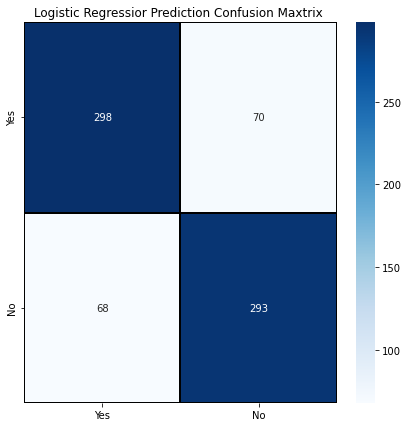

In [89]:
cm = confusion_matrix(y_test,pred_lr)
x_axis_labels = ['Yes', 'No']
y_axis_labels = ['Yes', 'No']
f,ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm,annot = True, linewidths=.2,linecolor='black',fmt= '.0f',ax=ax, cmap = 'Blues',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.title('Logistic Regressior Prediction Confusion Maxtrix ')

# Classification Algorithms

## Random Forest Classifier

In [90]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

print('Random Forest Accuracy Score is:- \n \n  ',accuracy_score(y_test,pred_rfc))
print('\n Confusion Matrix is :-\n  ', confusion_matrix(y_test,pred_rfc))
print('\n Classification Report is \n  ', classification_report(y_test,pred_rfc))

Random Forest Accuracy Score is:- 
 
   0.9039780521262003

 Confusion Matrix is :-
   [[318  50]
 [ 20 341]]

 Classification Report is 
                 precision    recall  f1-score   support

           0       0.94      0.86      0.90       368
           1       0.87      0.94      0.91       361

    accuracy                           0.90       729
   macro avg       0.91      0.90      0.90       729
weighted avg       0.91      0.90      0.90       729



## Confusion Matrix for Random Forest Classifier.

Text(0.5, 1.0, 'RFC Prediction Confusion Matrix')

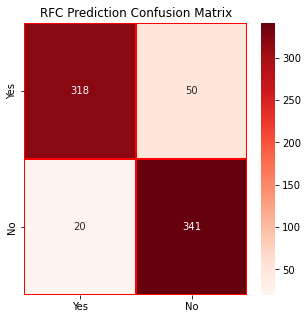

In [91]:
cm = confusion_matrix(y_test,pred_rfc)
x_axis_labels = ['Yes','No']
y_axis_labels = ['Yes','No']
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor='red',fmt = '.0f',ax=ax,cmap='Reds',xticklabels = x_axis_labels,yticklabels=y_axis_labels)
plt.title ('RFC Prediction Confusion Matrix')

# Decision Tree Classifier

In [92]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)


print('Decision Tree Classifier Accuracy Score is:- \n \n  ',accuracy_score(y_test,pred_dtc))
print('\n Confusion Matrix is :-\n  ', confusion_matrix(y_test,pred_dtc))
print('\n Classification Report is \n  ', classification_report(y_test,pred_dtc))

Decision Tree Classifier Accuracy Score is:- 
 
   0.840877914951989

 Confusion Matrix is :-
   [[300  68]
 [ 48 313]]

 Classification Report is 
                 precision    recall  f1-score   support

           0       0.86      0.82      0.84       368
           1       0.82      0.87      0.84       361

    accuracy                           0.84       729
   macro avg       0.84      0.84      0.84       729
weighted avg       0.84      0.84      0.84       729



## Confusion Matrix for Decision Tree Classifier.

Text(0.5, 1.0, 'DTC Prediction Confusion Matrix')

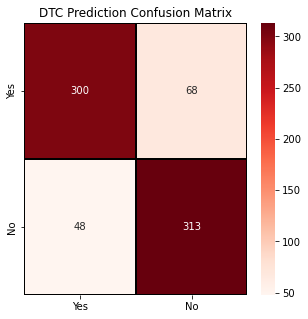

In [93]:
cm = confusion_matrix(y_test,pred_dtc)
x_axis_labels = ['Yes','No']
y_axis_labels = ['Yes','No']
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor='black',fmt='.0f',ax=ax,cmap='Reds',xticklabels = x_axis_labels,yticklabels = y_axis_labels)
plt.title('DTC Prediction Confusion Matrix')

# Support Vector Machine Classifier

In [94]:
svc = SVC(kernel='linear',gamma='scale')
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)

print('Accuracy Score :- ',accuracy_score(y_test,pred_svc))
print('Confusion Matrix \n ' ,confusion_matrix(y_test,pred_svc))
print('classification Report \n :- ',classification_report(y_test,pred_svc))

Accuracy Score :-  0.8065843621399177
Confusion Matrix 
  [[293  75]
 [ 66 295]]
classification Report 
 :-                precision    recall  f1-score   support

           0       0.82      0.80      0.81       368
           1       0.80      0.82      0.81       361

    accuracy                           0.81       729
   macro avg       0.81      0.81      0.81       729
weighted avg       0.81      0.81      0.81       729



## Confusion Matrix for Support Vector Machine Classifier.

Text(0.5, 1.0, 'SVM Classifier confusion_matrix')

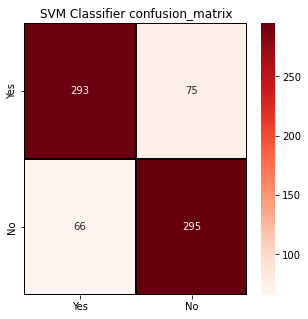

In [95]:
cm = confusion_matrix(y_test,pred_svc)
x_axis_labels = ['Yes','No']
y_axis_labels = ['Yes','No']
f,ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor='black',fmt='.0f',ax=ax,cmap='Reds',xticklabels = x_axis_labels,yticklabels=y_axis_labels)
plt.title('SVM Classifier confusion_matrix')

# KNN Classifier

In [96]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)

print('Accuracy Score:- ',accuracy_score(y_test,pred_knn))
print('Confusion Matrix:- ',confusion_matrix(y_test,pred_knn))
print('Classifier Report:- ', classification_report(y_test,pred_knn))

Accuracy Score:-  0.840877914951989
Confusion Matrix:-  [[295  73]
 [ 43 318]]
Classifier Report:-                precision    recall  f1-score   support

           0       0.87      0.80      0.84       368
           1       0.81      0.88      0.85       361

    accuracy                           0.84       729
   macro avg       0.84      0.84      0.84       729
weighted avg       0.84      0.84      0.84       729



## Confusion Matrix for KNN Classifier.

Text(0.5, 1.0, 'KNN Classifier confusion Matrix')

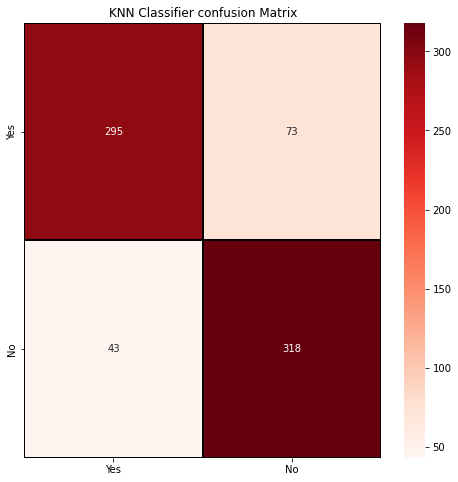

In [97]:
cm = confusion_matrix(y_test,pred_knn)
x_axis_labels = ['Yes','No']
x_axis_labels = ['Yes','No']
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor='black',fmt = '.0f',ax=ax,cmap='Reds',xticklabels = x_axis_labels,yticklabels = y_axis_labels)
plt.title('KNN Classifier confusion Matrix')

# Gradient Boosting Classifier

In [98]:
gbc = GradientBoostingClassifier(n_estimators=100,learning_rate=0.8,max_depth=4)
gbc.fit(x_train,y_train)
pred_gbc = gbc.predict(x_test)
print('GBC Accuracy Score is : ',accuracy_score(y_test,pred_gbc))
print('GBC Confusion Matrix \n',confusion_matrix(y_test,pred_gbc))
print('GBC Classification report \n',classification_report(y_test,pred_gbc))

GBC Accuracy Score is :  0.8600823045267489
GBC Confusion Matrix 
 [[311  57]
 [ 45 316]]
GBC Classification report 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       368
           1       0.85      0.88      0.86       361

    accuracy                           0.86       729
   macro avg       0.86      0.86      0.86       729
weighted avg       0.86      0.86      0.86       729



## Confusion Matrix for Gradient Boosting Classifier.

Text(0.5, 1.0, 'Confusion Matrix of GBC')

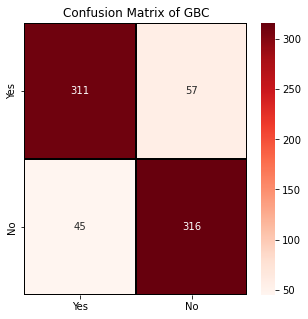

In [99]:
cm = confusion_matrix(y_test,pred_gbc)
x_axis_labels = ['Yes','No']
y_axis_labels = ['Yes','No']
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True,linewidths=.2,linecolor='black',fmt='.0f',ax=ax,cmap='Reds',xticklabels = x_axis_labels,yticklabels = y_axis_labels)
plt.title('Confusion Matrix of GBC')

# XGB Classifier

In [100]:
XGBC= XGBClassifier()
XGBC.fit(x_train,y_train)
pred_XGBC = XGBC.predict(x_test)
print('The Accuracy of XGBC is: ',accuracy_score(y_test,pred_XGBC))
print('Confusion Matrix of XGBC :- \n ', confusion_matrix(y_test,pred_XGBC))
print('classification report of XGBC:- \n ', classification_report(y_test,pred_XGBC))

The Accuracy of XGBC is:  0.879286694101509
Confusion Matrix of XGBC :- 
  [[315  53]
 [ 35 326]]
classification report of XGBC:- 
                precision    recall  f1-score   support

           0       0.90      0.86      0.88       368
           1       0.86      0.90      0.88       361

    accuracy                           0.88       729
   macro avg       0.88      0.88      0.88       729
weighted avg       0.88      0.88      0.88       729



## Confusion Matrix for XGB Classifier.

Text(0.5, 1.0, 'XGB Classifier prediction Confusion_matrix')

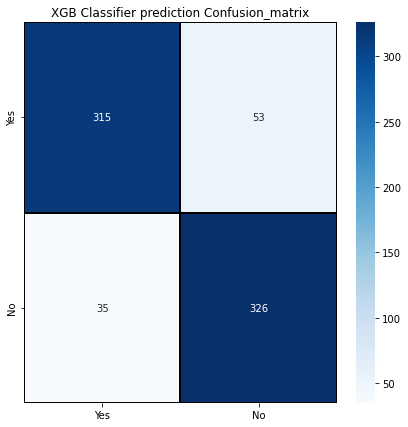

In [101]:
cm = confusion_matrix(y_test,pred_XGBC)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("XGB Classifier prediction Confusion_matrix")

# Cross Validation Score for all the model

In [102]:
#    CV Score for Logistic Regrassion 
print('CV Score for logistic Regression :- ',cross_val_score(lr,x,y,cv=5).mean())

#    CV Score for Random Forest Classifier

print('CV Score for Random Forest Classifier: ',cross_val_score(rfc,x,y,cv=5).mean())

#    CV Score for Decision tree Classifier

print('CV score for Decision Tree Classifier',cross_val_score(dtc,x,y,cv=5).mean())


#    CV Score for support vector Classifire

print('CV Score for Support Vector Classifier ',cross_val_score(svc,x,y,cv=5).mean())

#  CV Score for KNN classifier

print('CV Score for KNN Classifier',cross_val_score(knn,x,y,cv=5).mean())

#    CV Score for Gradian boosting Classifier

print('CV Score for Gradian Boosting Classifier',cross_val_score(gbc,x,y,cv=5).mean())

#   CV score for XGB Classifier

print('CV Score for XGB Classifier',cross_val_score(XGBC,x,y,cv=5).mean())

CV Score for logistic Regression :-  0.7927618461146443
CV Score for Random Forest Classifier:  0.8867064456878337
CV score for Decision Tree Classifier 0.8284030704874347
CV Score for Support Vector Classifier  0.7939968360814125
CV Score for KNN Classifier 0.8251115334387974
CV Score for Gradian Boosting Classifier 0.8784662426874197
CV Score for XGB Classifier 0.8871194538524424


### From the observation of accuracy and cross validation score and their difference we can predict that Random Forest Classifier is the best model.

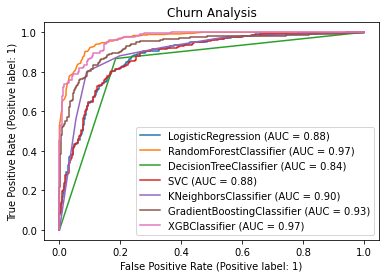

In [103]:
disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dtc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(XGBC,x_test,y_test,ax=disp.ax_)

plt.title('Churn Analysis')
plt.legend(prop={'size' : 10},loc = 'lower right')
plt.show()

# Hyper Perametertuning for best model using GridsearchCV

# The XGB Classifier with GridsearchCV

In [104]:
#from sklearn.model_selection import KFold

In [105]:
# params = {
    
#     'n_estimators' : [100,200,500],
#     'learning_rate' : [0.01,0.05,0.01],
#     'booster': ['gbtree', 'gblinear'],
#     'gamma': [0,0.5,1],
#     'reg_alpha' : [0,0.5,1],
#     'reg_lambda': [0.5,1,5],
#     'base_score': [0.2,0.5,1]
# }

In [106]:
#CV_XGBC = GridSearchCV(XGBClassifier(n_jobs=-1),params,n_jobs=-1,cv = KFold(n_splits=3),scoring='roc_auc')

In [107]:
#CV_XGBC.fit(x_train,y_train)

In [108]:
#CV_XGBC.best_params_ 

In [109]:
#CV_XGBC.best_estimator_

In [110]:
#bank = XGBClassifier(base_score=0.2,booster='gbtree',gamma=0.5,learning_rate=0.1,n_estimators = 500, reg_alpha=0.5,reg_lambda=1)

In [111]:
#bank.fit(x_train,y_train)

In [112]:
# pred=bank.predict(x_test)
# print('Accuracy Score',accuracy_score(y_test,pred))
# print('\n  confusion matrix  \n',confusion_matrix(y_test,pred))
# print('\n  Classification_matrix  \n',classification_report(y_test,pred))

In [113]:
# cm = confusion_matrix(y_test,pred)
# x_axis_labels = ['Yes','No']
# y_axis_labels = ['Yes','No']
# f,ax = plt.subplots(figsize = (5,5))
# sns.heatmap(cm,annot=True,linewidths=0.2,linecolor='black',fmt = '.0f',ax=ax,cmap='Blues',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
# plt.xlabel('Predicted Value')
# plt.ylabel('Actual Value')
# plt.title('Confusion Matrix for RF_HT')
# plt.show()

# Here the final model gives 90% accuracy after tuning.

# ROC-AUC Curve

In [114]:
# fpr,tpr,threshold = roc_curve(y_test,pred)
# auc = roc_auc_score(y_test,pred)

In [115]:
# plt.figure()
# plt.plot(fpr,tpr,color="blue",lw=2,label="ROC Curve (area= %0.2f)" % auc)
# plt.plot([0,1],[0,1],color="green",lw=2,linestyle="dashdot")
# plt.xlim([0.0,1.0])
# plt.ylim([0.0,1.05])
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("Bank Churn Analysis")
# plt.legend(loc="lower right")
# plt.show()

This is the AUC-ROC curve for the models which is plotted False positive rate against True positive rate. So the best model has the area under curve as 0.90.

# Saving The Model

In [116]:
import pickle
filename = 'Bank_Churn_Analysis.pickle'
pickle.dump(rfc,open(filename,'wb'))
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,

In [117]:
a = np.array(y_test)
predicted = np.array(loaded_model.predict(x_test))
Customer_Churn_Analysis = pd.DataFrame({'Original': a, 'Predicted': predicted}, index=range(len(a)))
Customer_Churn_Analysis

,Original,Predicted
0,0,0
1,0,0
2,0,1
3,0,0
4,1,1
...,...,...
724,1,1
725,0,0
726,1,1
727,1,1
